# Conditional Plots with Seaborn 

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Moving to more complicated charts with a tool built atop Matplotlib
<a href="http://seaborn.pydata.org/">Seaborn</a>

*from Dataquest*

We'll be working with a data set of the passengers of the Titanic. The Titanic shipwreck is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data set was compiled by Kaggle for their introductory data science competition, called Titanic: Machine Learning from Disaster. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes. You can download the data set by navigating to the data download page for the competition and creating a free account.

The data for the passengers is contained in two files:

train.csv: Contains data on 712 passengers
test.csv: Contains data on 418 passengers
Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the train.csv file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in test.csv, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in train.csv:

`PassengerId` -- A numerical id assigned to each passenger.

`Survived` -- Whether the passenger survived (1), or didn't (0).

`Pclass` -- The class the passenger was in.

`Name` -- the name of the passenger.

`Sex` -- The gender of the passenger -- male or female.

`Age` -- The age of the passenger. Fractional.

`SibSp` -- The number of siblings and spouses the passenger had on board.

`Parch` -- The number of parents and children the passenger had on board.

`Ticket` -- The ticket number of the passenger.

`Fare` -- How much the passenger paid for the ticker.

`Cabin` -- Which cabin the passenger was in.

`Embarked` -- Where the passenger boarded the Titanic.


In [4]:
columns = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

titanic = pd.read_csv("train.csv")

titanic = titanic[columns]

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic = titanic.dropna()

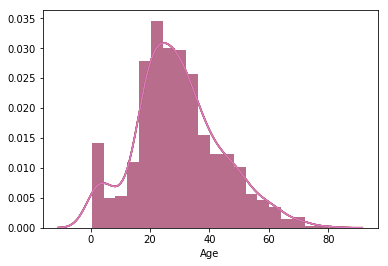

In [15]:
sns.distplot(titanic["Age"])
plt.show()

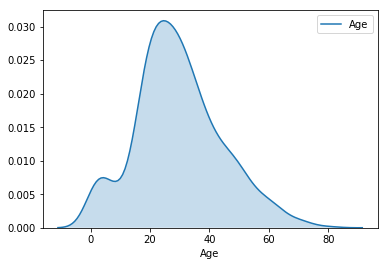

In [16]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel("Age")
plt.show()

### Styling the Kernel Density plot/styling Seaborn plots
From the plots in the previous step, you'll notice that seaborn:

Sets the x-axis label based on the column name passed through plt.xlabel() function
Sets the background color to a light gray color
Hides the x-axis and y-axis ticks
Displays the coordinate grid
In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the seaborn.set_style() function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

darkgrid: Coordinate grid displayed, dark background color
whitegrid: Coordinate grid displayed, white background color
dark: Coordinate grid hidden, dark background color
white: Coordinate grid hidden, white background color
ticks: Coordinate grid hidden, white background color, ticks visible
Here's a diagram that compares the same plot across all styles:
<img src="seaborn_all_styles.png"></img>

By default, the seaborn style is set to `"darkgrid"`:

`sns.set_style("darkgrid")`

If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the `seaborn.despine()` function:

`sns.despine()`

By default, only the top and right axes will be despined, or have their spines removed. To despine the other two axes, we need to set the left and bottom parameters to True.

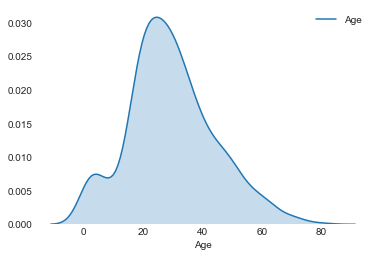

In [18]:
sns.set_style("white")
sns.kdeplot(titanic["Age"], shade=True)
sns.despine(left=True, bottom=True)

plt.xlabel('Age')
plt.show()

### Conditional distributions using a single distribution

In the last few missions, we created a small multiple, which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the "Age" column where Survived equalled 0 and the other would visualize the distribution of values in the "Age" column where Survived equalled 1.

Here's what those plots look like:

<img src="seaborn_simple_conditional.png"></img>

The code to generate the pair of plots, is short and sweet:

    # Condition on unique values of the "Survived" column.
    g = sns.FacetGrid(titanic, col="Survived", size=6)
    # For each subset of values, generate a kernel density plot of the "Age" columns.
    g.map(sns.kdeplot, "Age", shade=True)

Seaborn handled:

* subsetting the data into rows where Survived is 0 and where Survived is 1
* creating both Axes objects, ensuring the same axis scales
* plotting both kernel density plots

Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The seaborn.FacetGrid object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from FacetGrid is another word for "subset". Setting the col parameter to "Survived" specifies a separate plot for each unique value in the Survived column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the FacetGrid.map() method to specify the plot we want for each unique value of Survived. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into FacetGrid.map() has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

    g = sns.FacetGrid(titanic, col="Survived", size=6)
    g.map(plt.hist, "Age")

Let's create a grid of plots that displays the age distributions for each class.

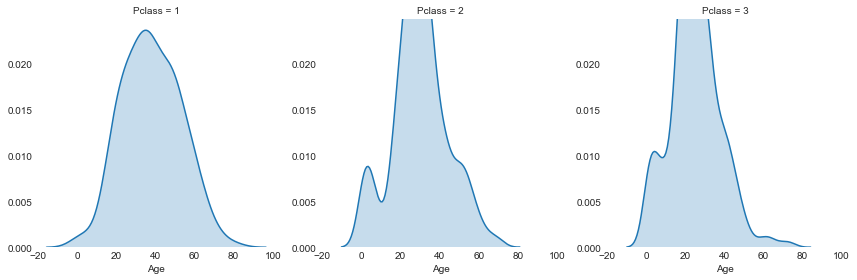

In [21]:
g = sns.FacetGrid(titanic, col="Pclass", size=4)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)

plt.show()

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the hue parameter to the column name from the dataframe.

Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.

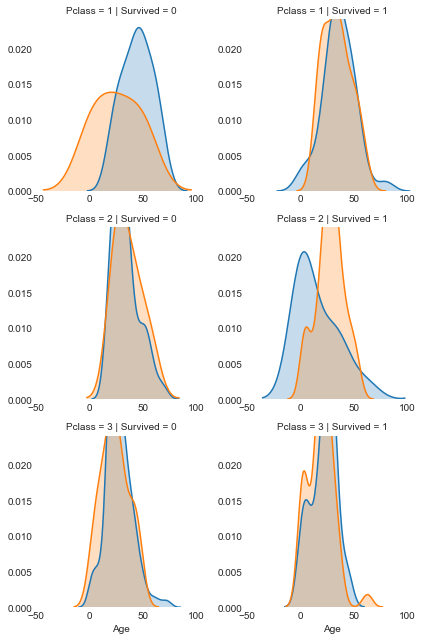

In [22]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

### Add a legend for the multiple plot overlay 

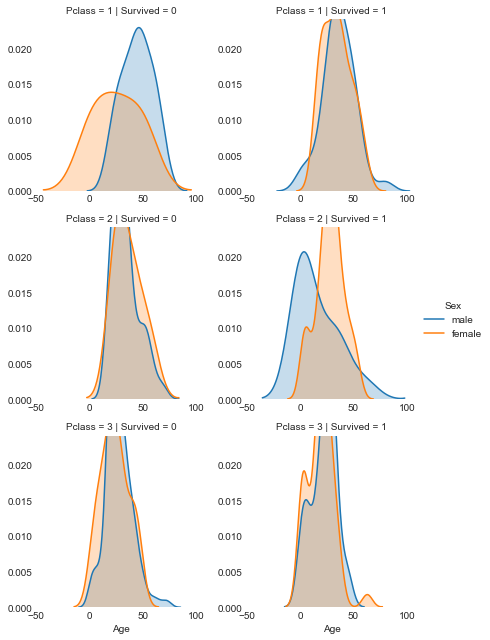

In [23]:
g = sns.FacetGrid(titanic, row="Pclass", col="Survived", hue="Sex", size=3)
g.map(sns.kdeplot, 'Age', shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)

plt.show()